# sex

In [1]:
import logging
import typing as t
from functools import lru_cache
from logging import log

import networkx as nx
import owlready2
from scipy import sparse as sp

import numpy as np
import torch
import pandas as pd
import pandas_gbq
from google.cloud import bigquery

In [2]:
# Query template format
query_format = """
    select {column_name}, count(*) as num_cells 
    from `cas_2024_05_16_dataset.human_cellariumgpt_extract__extract_cell_info`
    group by {column_name}
    order by num_cells desc
"""

## extract

In [3]:
query_name = "sex_ontology_term_id"
names_counts = pandas_gbq.read_gbq(
    query_format.format(column_name=query_name),
    project_id="dsp-cell-annotation-service",
)
names_counts

/home/yordabay/anaconda3/envs/ontology/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2379: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,sex_ontology_term_id,num_cells
0,PATO:0000384,19181831
1,PATO:0000383,16267559
2,unknown,2857853


In [4]:
query_label = "sex"
labels_counts = pandas_gbq.read_gbq(
    query_format.format(column_name=query_label),
    project_id="dsp-cell-annotation-service",
)
labels_counts

/home/yordabay/anaconda3/envs/ontology/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2379: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,sex,num_cells
0,male,19181831
1,female,16267559
2,unknown,2857853


<Axes: xlabel='sex'>

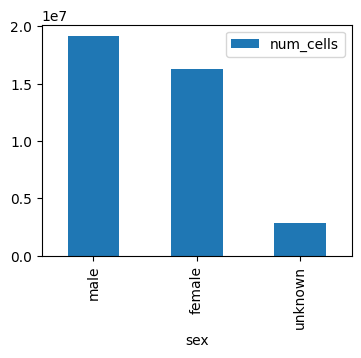

In [5]:
labels_counts.plot.bar(x=query_label, y="num_cells", figsize=(4, 3))

In [6]:
new_names = names_counts[query_name].values.tolist()
new_labels = labels_counts[query_label].values.tolist()

In [8]:
# remove unknown
new_labels = new_labels[:2]
new_names = new_names[:2]
new_names

['PATO:0000384', 'PATO:0000383']

In [9]:
torch.save({
        "names": new_names,
        "labels": new_labels,
    },
    "sex_ontology_data.pt"
)